In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [2]:
df = pd.DataFrame.from_csv('2challenge_original.csv')
df0 = df.loc[df['label'] == 0.0]
df1 = df.loc[df['label'] == 1.0]
dftest = df.loc[~((df['label'] == 0.0) | (df['label'] == 1.0))]
print(df.shape)
print(df0.shape)
print(df1.shape)
print(dftest.shape)

(15000, 9)
(5000, 9)
(5000, 9)
(5000, 9)


c:\users\narendra\.conda\envs\tensorflow\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  if __name__ == '__main__':


In [3]:
TrainingData0 = df0.as_matrix(columns=None)
TrainingData1 = df1.as_matrix(columns=None)
TestData = dftest.as_matrix(columns=['Y0', 'Y1', 'Y2', 'Y3', 'Y4', 'Y5', 'Y6', 'Y7'])

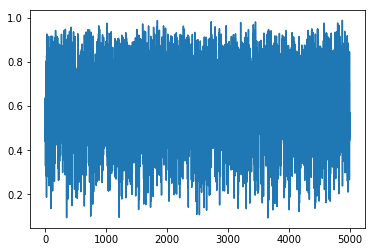

[ 0.3916439   0.39089352  0.39239032  0.39069693  0.3899083   0.39253852] 0.3913452489
[ 0.17798067  0.17864793  0.17790641  0.17864686  0.18053506  0.18041744]
[ 0.60724419  0.60789752  0.6098887   0.60690931  0.61260257  0.61257014] 0.609518738248
[ 0.17866707  0.1781169   0.17790739  0.17753359  0.17691808  0.17862967]


In [8]:
"""
Check the charcteristics of data. All columns with label 0 seem to have mean of ~0.39 and variance of ~0.178. 
Similarly, columns with label 1 have mean ~0.61 and variance of ~0.178.

"""

#plt.plot(TrainingData0[:,0])
#plt.plot(TrainingData1[:,0])
plt.plot(TestData[:,0])
plt.show()
print(np.mean(TrainingData0[:,:6], axis = 0), np.mean(np.mean(TrainingData0[:,:6], axis = 0)))
print(np.std(TrainingData0[:,:6], axis = 0))
print(np.mean(TrainingData1[:,:6], axis = 0), np.mean(np.mean(TrainingData1[:,:6], axis = 0)))
print(np.std(TrainingData1[:,:6], axis = 0))

In [5]:
"""
I use the sequential observation with the assumption of gaussian observation. Furthermore, gaussian have equal variance.

 or    (1/n) sum(y1 + ... + yn) >< mean2 + (mean1 - mean2)/2 = (mean1 + mean2)/2
"""


count_0 = 0
for zeros in TrainingData0[:,:8]:
    valid_indexs = [i for i, zero in enumerate(zeros) if not math.isnan(zero)]    # take columns indexs which have valid values
    if np.mean(zeros[valid_indexs]) < (0.39 + (0.61 - 0.39)/2):                   # take mean of a row and compare with threshold
        count_0 += 1 
print(count_0)

count_1 = 0
for ones in TrainingData1[:,:8]:
    valid_indexs = [i for i, one in enumerate(ones) if not math.isnan(one)]      # take columns indexs which have valid values
    if np.mean(ones[valid_indexs]) > (0.39 + (0.61 - 0.39)/2):                   # take mean of a row and compare with threshold
        count_1 += 1 
print(count_1)


print('Training Error: ', (10000 - count_0 - count_1)/100, '%' )               # compute training error

labels = np.zeros([5000])
for k, Tests in enumerate(TestData):
    valid_indexs = [i for i, test in enumerate(Tests) if not math.isnan(test)]   # take columns indexs which have valid values
    if np.mean(Tests[valid_indexs]) >= (0.39 + (0.61 - 0.39)/2):                 # take mean of a row and compare with threshold
        labels[k] = 1
    else:
        labels[k] = 0
print(np.sum(labels))
dftest['label'] = labels

4717
4703
Training Error:  5.8 %
4722.0


c:\users\narendra\.conda\envs\tensorflow\lib\site-packages\ipykernel\__main__.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [6]:
df = pd.concat([df0, df1, dftest], join='outer', ignore_index=True)
df.to_csv("2challenge.csv")